# Project: House Price Prediction Model

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings("ignore")

In [2]:
# reading the excel dataset

df = pd.read_excel("final_processed_data.xlsx")

In [3]:
# checking first 5 columns

df.head()

,Unnamed: 0,title,price,size,price_per_sqft,space,city,locality
0,0,3 BHK Apartment in CasaGrand Casagrand Meridian,11800000.0,2037.0,5793.0,3 BHK,Bangalore,CasaGrand Casagrand Meridian
1,1,2 BHK Apartment in Shree Nandana Elite,5756000.0,1240.0,4642.0,2 BHK,Bangalore,Shree Nandana Elite
2,2,Residential Plot in Saroj Whispering Winds,3230000.0,2000.0,1615.0,Residential Plot,Bangalore,Saroj Whispering Winds
3,3,3 BHK Apartment in Navami Landmaark,13300000.0,1641.0,8133.0,3 BHK,Bangalore,Navami Landmaark
4,4,2 BHK Apartment in V Venture EVA,5532000.0,957.0,5787.0,2 BHK,Bangalore,V Venture EVA


In [4]:
df = df.rename(columns={'size': 'size_sqft'})

In [5]:
# checking the last 5 columns

df.tail()

,Unnamed: 0,title,price,size_sqft,price_per_sqft,space,city,locality
47997,47997,My Home Vihanga 3 BHK Flat Gachibowli,1.850000e+07,1835.000000,1.008174e+04,3 BHK,Gachibowli,My Home Vihanga
47998,47998,Pacifica Hillcrest Phase 2 3 BHK Flat Gachi...,1.270000e+07,2061.000000,6.162057e+03,3 BHK,Gachibowli,Pacifica Hillcrest Phase 2
47999,47999,Pacifica Hillcrest Phase 1 2 BHK Flat Gachi...,1.200000e+07,886.000000,1.354402e+04,2 BHK,Gachibowli,Pacifica Hillcrest Phase 1
48000,48000,Gachibowli County Office Space in IT/SEZ Gac...,4.760000e+09,2048.266082,2.323917e+06,Unknown,Gachibowli,Gachibowli County
48001,48001,Prestige High Fields 2 BHK Flat Gachibowli,1.380000e+07,892.000000,1.547085e+04,2 BHK,Gachibowli,Prestige High Fields


In [6]:
# cheking the shape of the dataset

df.shape

(48002, 8)

In [7]:
# removing the unnecessary column Unnamed: 0 and status

df = df.drop(['Unnamed: 0','title','locality'], axis=1)

In [8]:
df.head(3)

,price,size_sqft,price_per_sqft,space,city
0,11800000.0,2037.0,5793.0,3 BHK,Bangalore
1,5756000.0,1240.0,4642.0,2 BHK,Bangalore
2,3230000.0,2000.0,1615.0,Residential Plot,Bangalore


In [9]:
# df.to_excel('final_processed_data_1.xlsx')

## Importing the merged data 

In [10]:
df = pd.read_excel('Merged Data.xlsx')

In [11]:
df.head()

,Unnamed: 0,price,size_sqft,price_per_sqft,space,city
0,0,11800000.0,2037.0,5793.0,3 BHK,Bangalore
1,1,5756000.0,1240.0,4642.0,2 BHK,Bangalore
2,2,3230000.0,2000.0,1615.0,plot,Bangalore
3,3,13300000.0,1641.0,8133.0,3 BHK,Bangalore
4,4,5532000.0,957.0,5787.0,2 BHK,Bangalore


In [12]:
df.shape

(89961, 6)

In [13]:
df = df.drop(['Unnamed: 0'], axis=1)

In [14]:
df.tail()

,price,size_sqft,price_per_sqft,space,city
89956,592000.0,1485.0,398.653199,plot,Lucknow
89957,536000.0,1344.0,398.809524,plot,Lucknow
89958,669000.0,1677.0,398.926655,plot,Lucknow
89959,844000.0,1876.0,449.893390,plot,Lucknow
89960,1127000.0,2505.0,449.900200,plot,Lucknow


In [15]:
# getting the overall statistics of our data

df.describe()

,price,size_sqft,price_per_sqft
count,8.996100e+04,8.996100e+04,8.995800e+04
mean,6.556827e+07,2.122146e+03,3.609435e+04
std,4.789347e+08,4.598007e+04,1.894491e+05
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.800000e+06,1.130000e+03,3.759294e+03
50%,8.916000e+06,1.400000e+03,6.148148e+03
75%,2.812000e+07,1.900000e+03,1.481481e+04
max,7.695000e+10,1.350228e+07,2.700000e+07


In [16]:
# getting the overall information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89961 entries, 0 to 89960
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           89961 non-null  float64
 1   size_sqft       89961 non-null  float64
 2   price_per_sqft  89958 non-null  float64
 3   space           89961 non-null  object 
 4   city            89961 non-null  object 
dtypes: float64(3), object(2)
memory usage: 3.4+ MB


## Data Cleaning and Preprocessing

In [17]:
# checking for duplicates in the data

df.duplicated().sum()

7964

In [18]:
# dropping the duplicated datas

df = df.drop_duplicates()

In [19]:
# resetting the index of the DataFrame

df.reset_index(drop=True, inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
# checking for null values

df.isnull().sum()

price             0
size_sqft         0
price_per_sqft    3
space             0
city              0
dtype: int64

In [22]:
df = df.dropna()

### Note
- It is clearly noticable that size, price_per_sqft and status columns have empty data in them.
- So we will need to remove those empty data so that our ML model works efficiently

### Filling up the null values in the size column

In [23]:
#replacing the " sqrt" term from the size column

# df['size'] = df['size'].str.replace(' sqft| Sq.Ft.', '')

In [24]:
# df['size']

In [25]:
# # Convert the column to a numeric data type
# df['size'] = pd.to_numeric(df['size'], errors='coerce')

# # Calculate the mean, excluding NaN values
# column_mean = df['size'].mean(skipna=True)

# # Checking the mean value
# print(column_mean)

In [26]:
# df['size'].fillna(column_mean, inplace=True)

In [27]:
# dropping the other null values

df = df.dropna()

In [28]:
df.isnull().sum()

price             0
size_sqft         0
price_per_sqft    0
space             0
city              0
dtype: int64

### Converting word price to numeric values

In [29]:
# df['price'] = df['price'].astype(str)

In [30]:
# df['price'] = df['price'].str.replace('₹', '')

In [31]:
# def convert_value(value):
#     if 'Cr' in value:
#         return float(value.replace(' Cr', '')) * 10000000
#     elif 'Lac' in value:
#         return float(value.replace(' Lac', '')) * 100000
#     elif 'L' in value:
#         return float(value.replace(' L', '')) * 100000
#     elif 'ac' in value:
#         return float(value.replace('ac', '')) * 100000
#     elif 'Call for Price' in value:
#         return float(value.replace('Call for Price', '0')) * 0
#     elif 'Price on Request' in value:
#         return float(value.replace('Price on Request', '0')) * 0
#     else:
#         return float(value)

# pd.options.display.float_format = '{:.2f}'.format
# df['price'] = df['price'].apply(convert_value)

In [32]:
# df.tail(3)

In [33]:
# df.info()

### Preprocessing the price_per_sqft column of the DataFrame

In [34]:
#removing the unnecessary symbols

# df['price_per_sqft'] = df['price_per_sqft'].str.replace(' / sq ft', '')
# df['price_per_sqft'] = df['price_per_sqft'].str.replace(' per sqft', '')
# df['price_per_sqft'] = df['price_per_sqft'].str.replace('₹', '')
# df['price_per_sqft'] = df['price_per_sqft'].str.replace(',', '')

In [35]:
#calculating the price_per_sqft to fill in the null values

# def calculate_price_per_sqft(row):
#     if pd.isna(row['price_per_sqft']):
#         if row['price'] == 0:
#             return 0
#         else:
#             return row['price'] / row['size']
#     else:
#         return row['price_per_sqft']

# pd.options.display.float_format = '{:.2f}'.format
# df['price_per_sqft'] = df.apply(calculate_price_per_sqft, axis=1)


In [36]:
#converting price_per_sqft to float Dtype

# df['price_per_sqft']=df['price_per_sqft'].astype(float)

- <b><i> after bringing all the data to the standard format, we will check for duplicates again </i> </b>

In [37]:
df.duplicated().sum()

0

In [38]:
# dropping the duplicates
df = df.drop_duplicates()

In [39]:
# dropping the values for which price is 0

df = df.drop(df[df['price'] == 0].index)

In [40]:
df.shape

(81943, 5)

In [41]:
df.reset_index(drop=True, inplace=True)

In [42]:
df.tail()

,price,size_sqft,price_per_sqft,space,city
81938,592000.0,1485.0,398.653199,plot,Lucknow
81939,536000.0,1344.0,398.809524,plot,Lucknow
81940,669000.0,1677.0,398.926655,plot,Lucknow
81941,844000.0,1876.0,449.893390,plot,Lucknow
81942,1127000.0,2505.0,449.900200,plot,Lucknow


In [43]:
# df.drop('title', axis=1, inplace=True)

### Saving the processed and clean data into another excel sheet

In [44]:
# df.to_excel('ready_for_EDA.xlsx')

In [45]:
dataFrame = df.copy()

In [46]:
dataFrame['space'] = df['space'].str.strip()


In [47]:
dataFrame['space'].nunique()

17

In [48]:
dataFrame['space'].value_counts()

plot       24882
3 BHK      23709
2 BHK      19699
4 BHK       6948
1 BHK       1932
5 BHK       1475
shop         892
6 BHK        797
office       524
land         382
7 BHK        195
8 BHK        158
0 BHK        106
flat         104
9 BHK         97
Unknown       41
66 BHK         2
Name: space, dtype: int64

In [49]:
dataFrame = dataFrame[~dataFrame['space'].isin(['flat', 'Unknown', 'land', 'office', 'shop', '0 BHK', 'plot'])]

In [50]:
dataFrame['space'].value_counts()

3 BHK     23709
2 BHK     19699
4 BHK      6948
1 BHK      1932
5 BHK      1475
6 BHK       797
7 BHK       195
8 BHK       158
9 BHK        97
66 BHK        2
Name: space, dtype: int64

- <b> from the space column, we can extract the accurate space provided</b>

In [51]:
def extract_size(space_value):
    if 'BHK' in space_value:
        size = space_value.split(' ')[0]
        if size.isdigit():
            return int(size)
        else:
            return 0
#     elif 'Bedroom' in space_value:
#         size = space_value.split(' ')[0]
#         if size.isdigit():
#             return int(size)
#         else:
#             return 0
#     elif 'Residential' in space_value:
#         return 'Residential'
#     elif 'Unknown' in space_value:
#         return 'Unknown'
    elif 'plot' in space_value:
        return 'plot'
    else:
        return 0

In [52]:
dataFrame['BHK'] = dataFrame['space'].apply(extract_size).astype('str')

In [53]:
counts = dataFrame['BHK'].value_counts()
counts

3     23709
2     19699
4      6948
1      1932
5      1475
6       797
7       195
8       158
9        97
66        2
Name: BHK, dtype: int64

### - It is seen that, according to our project aim, we don't need certain house details, so it is better to drop those values

In [54]:
# values_to_drop = ['Residential', 'Unknown', 'Plot', '6+']
# dataFrame = dataFrame[~dataFrame['BHK'].isin(values_to_drop)]
# dataFrame.reset_index(drop=True, inplace=True)

In [55]:
counts = dataFrame['BHK'].value_counts()
counts

3     23709
2     19699
4      6948
1      1932
5      1475
6       797
7       195
8       158
9        97
66        2
Name: BHK, dtype: int64

- <b>Now we are left out with only the numerical BHK type houses only</b>

In [56]:
dataFrame['BHK'] = dataFrame['BHK'].astype('float64')

In [57]:
dataFrame.drop(['space'], axis=1, inplace=True)

In [58]:
dataFrame.head()

,price,size_sqft,price_per_sqft,city,BHK
0,11800000.0,2037.0,5793.0,Bangalore,3.0
1,5756000.0,1240.0,4642.0,Bangalore,2.0
3,13300000.0,1641.0,8133.0,Bangalore,3.0
4,5532000.0,957.0,5787.0,Bangalore,2.0
5,8347000.0,1575.0,5300.0,Bangalore,3.0


In [59]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55012 entries, 0 to 81907
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           55012 non-null  float64
 1   size_sqft       55012 non-null  float64
 2   price_per_sqft  55012 non-null  float64
 3   city            55012 non-null  object 
 4   BHK             55012 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.5+ MB


<h1><b>Exploratory Data Analysis</b></h1>

In [60]:
object_columns = dataFrame.select_dtypes(include='object').columns
print("Object Columns:")
print(object_columns)
print()

numerical_columns = dataFrame.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_columns)

Object Columns:
Index(['city'], dtype='object')

Numerical Columns:
Index(['price', 'size_sqft', 'price_per_sqft', 'BHK'], dtype='object')


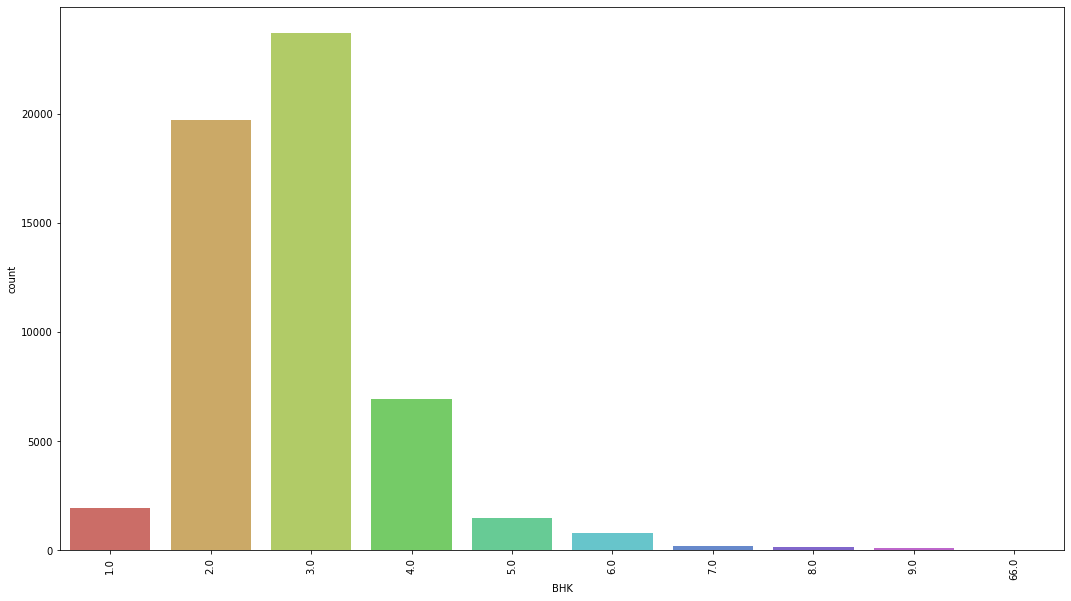

In [61]:
plt.figure(figsize=(18,10))
sns.countplot('BHK', data = dataFrame, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [62]:
df1 = dataFrame.copy()

In [63]:
df1.shape

(55012, 5)

In [64]:
len(df1.city.unique())

8

In [65]:
df1['city'].value_counts()

Bangalore        33254
Greater Noida     6054
Hyderabad         5527
Faridabad         4430
Lucknow           3050
Ghaziabad         1788
Gachibowli         637
Mysore             272
Name: city, dtype: int64

In [66]:
df1.head()

,price,size_sqft,price_per_sqft,city,BHK
0,11800000.0,2037.0,5793.0,Bangalore,3.0
1,5756000.0,1240.0,4642.0,Bangalore,2.0
3,13300000.0,1641.0,8133.0,Bangalore,3.0
4,5532000.0,957.0,5787.0,Bangalore,2.0
5,8347000.0,1575.0,5300.0,Bangalore,3.0


In [67]:
df1[df1.size_sqft/df1.BHK < 250].head()

,price,size_sqft,price_per_sqft,city,BHK
72,5898000.0,703.0,8391.0,Bangalore,3.0
536,1199000.0,610.0,1967.0,Bangalore,3.0
796,5798000.0,702.0,8272.0,Bangalore,3.0
2826,11200000.0,702.0,16000.0,Bangalore,3.0
5379,4999000.0,463.0,10821.0,Bangalore,2.0


In [68]:
df2 = df1[~(df1.size_sqft/df1.BHK < 300)]
df2.head()

,price,size_sqft,price_per_sqft,city,BHK
0,11800000.0,2037.0,5793.0,Bangalore,3.0
1,5756000.0,1240.0,4642.0,Bangalore,2.0
3,13300000.0,1641.0,8133.0,Bangalore,3.0
4,5532000.0,957.0,5787.0,Bangalore,2.0
5,8347000.0,1575.0,5300.0,Bangalore,3.0


In [69]:
df2.shape

(52562, 5)

In [70]:
df2['price_per_sqft'].describe()

count    5.256200e+04
mean     3.483650e+04
std      1.445218e+05
min      2.257423e+00
25%      5.120482e+03
50%      7.083000e+03
75%      2.190095e+04
max      6.719665e+06
Name: price_per_sqft, dtype: float64

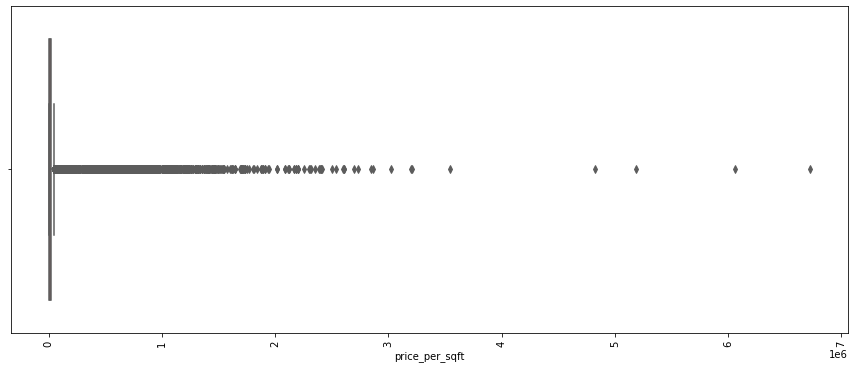

In [71]:
plt.figure(figsize=(15,6))
sns.boxplot('price_per_sqft', data = df2, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [72]:
# bringing the price to lakh
df2['price'] = df2['price']/100000
df2.head(10)

,price,size_sqft,price_per_sqft,city,BHK
0,118.00,2037.0,5793.0,Bangalore,3.0
1,57.56,1240.0,4642.0,Bangalore,2.0
3,133.00,1641.0,8133.0,Bangalore,3.0
4,55.32,957.0,5787.0,Bangalore,2.0
5,83.47,1575.0,5300.0,Bangalore,3.0
6,150.00,1770.0,8509.0,Bangalore,3.0
8,89.36,2079.0,4298.0,Bangalore,3.0
9,209.00,2945.0,7123.0,Bangalore,3.0
10,175.00,1950.0,8974.0,Bangalore,4.0
12,341.00,3067.0,11118.0,Bangalore,4.0


In [73]:
df3 = df2[~(df2['price_per_sqft']>50000)]

In [74]:
# def remove_pps_outliers(dataFrame1):
#     df_out = pd.DataFrame()
#     for key, subdf in dataFrame1.groupby('city'):
#         m = np.mean(subdf.price_per_sqft)
#         st = np.std(subdf.price_per_sqft)
#         reduced_df = subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<(m+st))]
#         df_out = pd.concat([df_out, reduced_df], ignore_index = True)
#     return df_out
# df3 = remove_pps_outliers(df2)
df3.shape

(46175, 5)

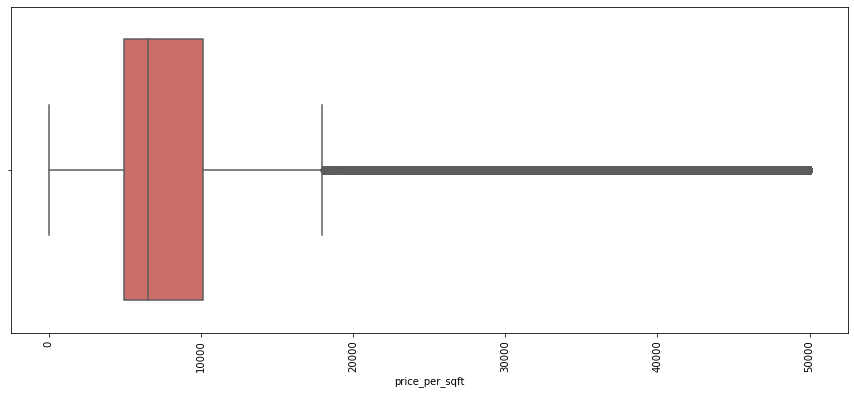

In [75]:
plt.figure(figsize=(15,6))
sns.boxplot('price_per_sqft', data = df3, palette='hls')
plt.xticks(rotation = 90)
plt.show()

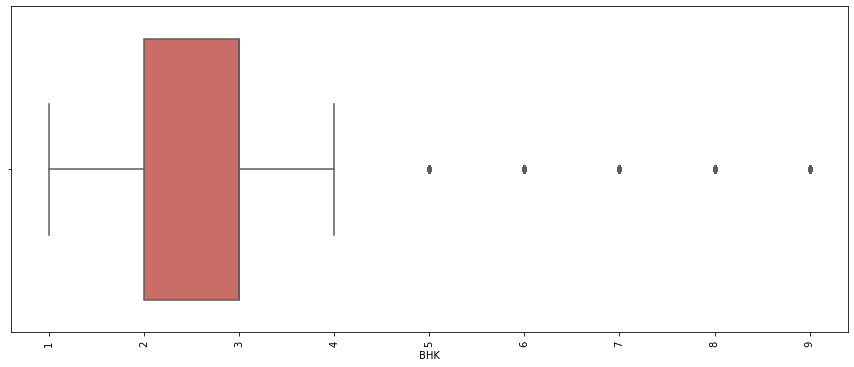

In [76]:
plt.figure(figsize=(15,6))
sns.boxplot('BHK', data = df3, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [77]:
df3.duplicated().sum()

2

In [78]:
df3.drop_duplicates(inplace=True)

In [79]:
# df3.to_excel('data_ready_for_model_building.xlsx')

# Working in the processed data (used Pandas Profiling)

In [80]:
data = df3.copy()

In [81]:
# Used pandas profiling to make it easy in handling the outliers more efficiently
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file='output.html')

In [82]:
data = data[data['price'] <= 700]
data.reset_index(drop=True, inplace=True)

In [83]:
data = data[data['price'] >= 20]
data.reset_index(drop=True, inplace=True)
data.head(3)

,price,size_sqft,price_per_sqft,city,BHK
0,118.00,2037.0,5793.0,Bangalore,3.0
1,57.56,1240.0,4642.0,Bangalore,2.0
2,133.00,1641.0,8133.0,Bangalore,3.0


In [84]:
data.duplicated().sum()

0

In [85]:
data.describe()

,price,size_sqft,price_per_sqft,BHK
count,43993.000000,4.399300e+04,43993.000000,43993.000000
mean,159.444446,1.752669e+03,10336.636544,2.712841
std,152.792296,9.583994e+03,10692.763509,0.924295
min,20.000000,3.000000e+02,2.257423,1.000000
25%,62.000000,1.125000e+03,4905.000000,2.000000
50%,93.720000,1.370000e+03,6376.000000,3.000000
75%,190.000000,1.829000e+03,9365.000000,3.000000
max,700.000000,1.306800e+06,50000.000000,9.000000


In [86]:
data.shape

(43993, 5)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43993 entries, 0 to 43992
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           43993 non-null  float64
 1   size_sqft       43993 non-null  float64
 2   price_per_sqft  43993 non-null  float64
 3   city            43993 non-null  object 
 4   BHK             43993 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB


In [88]:
# checking the unique values and their counts in each column

for column in data.columns:
    print(data[column].value_counts())
    print("*"*20)

65.00     494
75.00     478
70.00     454
85.00     454
120.00    428
         ... 
96.77       1
53.41       1
47.33       1
58.29       1
55.14       1
Name: price, Length: 5981, dtype: int64
********************
1200.000000    806
1834.322174    529
1250.000000    505
1500.000000    451
1100.000000    448
              ... 
7754.000000      1
5516.000000      1
2671.000000      1
5201.000000      1
4334.000000      1
Name: size_sqft, Length: 3299, dtype: int64
********************
5000.000000     438
4500.000000     275
4000.000000     240
5500.000000     232
5200.000000     183
               ... 
7565.415245       1
22083.333333      1
3383.660131       1
7535.211268       1
3217.821782       1
Name: price_per_sqft, Length: 22279, dtype: int64
********************
Bangalore        29948
Hyderabad         5323
Lucknow           2735
Greater Noida     2699
Faridabad         1447
Ghaziabad          970
Gachibowli         608
Mysore             263
Name: city, dtype: int64
***********

In [89]:
data.describe()

,price,size_sqft,price_per_sqft,BHK
count,43993.000000,4.399300e+04,43993.000000,43993.000000
mean,159.444446,1.752669e+03,10336.636544,2.712841
std,152.792296,9.583994e+03,10692.763509,0.924295
min,20.000000,3.000000e+02,2.257423,1.000000
25%,62.000000,1.125000e+03,4905.000000,2.000000
50%,93.720000,1.370000e+03,6376.000000,3.000000
75%,190.000000,1.829000e+03,9365.000000,3.000000
max,700.000000,1.306800e+06,50000.000000,9.000000


 - min value of price_per_sqft is 2.25 which is surely an outlier

In [90]:
# removing the data for which price_per_sqft is less than 1000
data = data[~(data['price_per_sqft']<=1000)]
data.shape

(43923, 5)

In [91]:
data = data.drop('price_per_sqft', axis=1).copy()

In [92]:
(data['size_sqft']/data['BHK']).describe()

count    43923.000000
mean       595.145507
std        235.473937
min        300.000000
25%        480.000000
50%        562.500000
75%        647.500000
max      10030.000000
dtype: float64

- Flat with more than 100000 sqft seems to be outlier

In [93]:
data = data[~(data['size_sqft'] >= 3000)]
data.shape

(40600, 4)

In [94]:
data = data[~(data['BHK'] >= 5)]
data.shape

(40103, 4)

In [95]:
data=data.drop_duplicates()
data.shape

(38013, 4)

In [96]:
data.duplicated().sum()

0

In [97]:
data.to_csv('cleaned data.csv')

In [98]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Model building

In [99]:
X = data.drop(columns=['price'])
y = data['price']

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [102]:
X_train.shape

(30410, 3)

In [103]:
X_test

,size_sqft,city,BHK
11618,1612.0,Bangalore,3.0
11653,2080.0,Bangalore,4.0
15309,1704.0,Bangalore,3.0
13825,1180.0,Bangalore,2.0
43705,1466.0,Lucknow,3.0
...,...,...,...
27486,1129.0,Bangalore,2.0
34219,1175.0,Greater Noida,2.0
13030,1900.0,Bangalore,3.0
17713,1900.0,Bangalore,3.0


## Applying Linear Regression

In [104]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['city']), remainder='passthrough')

In [105]:
scaler = StandardScaler()

In [106]:
lr = LinearRegression()

In [107]:
pipe = make_pipeline(column_trans, scaler, lr)

In [108]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['city'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [109]:
y_test

11618    140.00
11653    135.00
15309    325.00
13825     93.12
43705     51.00
          ...  
27486     44.00
34219    480.00
13030    112.00
17713     50.00
43065     54.65
Name: price, Length: 7603, dtype: float64

In [110]:
X_test

,size_sqft,city,BHK
11618,1612.0,Bangalore,3.0
11653,2080.0,Bangalore,4.0
15309,1704.0,Bangalore,3.0
13825,1180.0,Bangalore,2.0
43705,1466.0,Lucknow,3.0
...,...,...,...
27486,1129.0,Bangalore,2.0
34219,1175.0,Greater Noida,2.0
13030,1900.0,Bangalore,3.0
17713,1900.0,Bangalore,3.0


In [111]:
y_pred_lr = pipe.predict(X_test)
y_pred_lr

array([127.96550923, 189.52117329, 137.81951314, ..., 158.81316548,
       158.81316548,  32.25310689])

In [112]:
r2_score(y_test, y_pred_lr)

0.809573391479178

## Applying Ridge

In [113]:
ridge = Ridge()

In [114]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [115]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['city'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [116]:
y_pred_ridge = pipe.predict(X_test)
y_pred_ridge

array([127.7699359 , 189.32573413, 137.62338021, ..., 158.61550069,
       158.61550069,  32.89443468])

In [117]:
r2_score(y_test, y_pred_ridge)

0.8095906015518842

## Dumping the best Model

In [118]:
import pickle

In [119]:
pickle.dump(pipe, open('ridge_model.pkl', 'wb'))